# Title - Heart Disease prediction

### Introduction
The goal of this notebook is to predict heart disease based on certain health conditions. Heart disease is common today, and having models that can predict it early can help with treatment in the early stages, potentially saving lives. Additionally, this notebook aims to identify the main factors contributing to heart disease and help recognize those at higher risk.

### Table of Contents

* Importing Libraries
* Importing Dataset
* Data Cleaning and preprocessing the data
* Univariant Analysis
* Scaling and normalizing the data
* Correlation matrix and further readings
* Models

### Importing Libraries

In [5]:
# Importing the required libraries
import numpy as np        #linear algebra
import pandas as pd       #dataframes and preprocessing
import matplotlib.pyplot as plt      #data visualization
import seaborn as sns               #data visualization
import plotly.express as px        #data visualization

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline               
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler     #scaling and normalizing the data
from sklearn.model_selection import train_test_split               #splitting the data into training and testing

### Importing Dataset

In [7]:
# Importing the Dataset
df = pd.read_csv('heart_disease_dataset.csv')         

In [8]:
# getting first five rows of the dataset
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


### Data Cleaning and Preprocessing

In [10]:
# Getting number of Rows and Columns 
df.shape

(1000, 16)

In [11]:
# checking null and missing values
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [12]:
# Counting values with its types
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

There are 340 missing values in the 'Alcohol Intake' column, which is 34% of the total data. Since this is a significant amount, we can't delete these rows. We assume that the other values suggest light or no alcohol intake, so we'll fill the missing values with "light" or "none" for better analysis.

In [14]:
# filling values in missing columns
df.fillna('Light/none', inplace=True)

In [15]:
# checking again null and missing values 
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [16]:
df.head(3)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Light/none,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1


In [17]:
# checking the age group of the dataset
df['Age'].describe()

count    1000.000000
mean       52.293000
std        15.727126
min        25.000000
25%        39.000000
50%        52.000000
75%        66.000000
max        79.000000
Name: Age, dtype: float64

The age group in this dataset ranges from 25 to 79, which is a diverse range and will allow for a more balanced analysis.

### Univariant Analysis

In [20]:
# Plotting the numerical variables to obtain an idea of the dataset
numerical_vars = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
for var in numerical_vars:
    print(f"Variable: {var}")
    print(f"Mean: {df[var].mean()}")

Variable: Age
Mean: 52.293
Variable: Cholesterol
Mean: 249.939
Variable: Blood Pressure
Mean: 135.281
Variable: Heart Rate
Mean: 79.204
Variable: Exercise Hours
Mean: 4.529
Variable: Stress Level
Mean: 5.646
Variable: Blood Sugar
Mean: 134.941


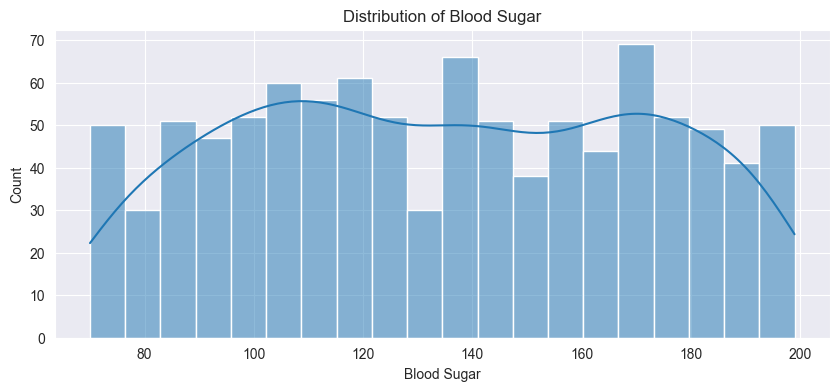

In [21]:
# Histogram of each variable
plt.figure(figsize=(10,4))
sns.histplot(df[var], bins=20, kde=True)
plt.title(f'Distribution of {var}')
plt.show()

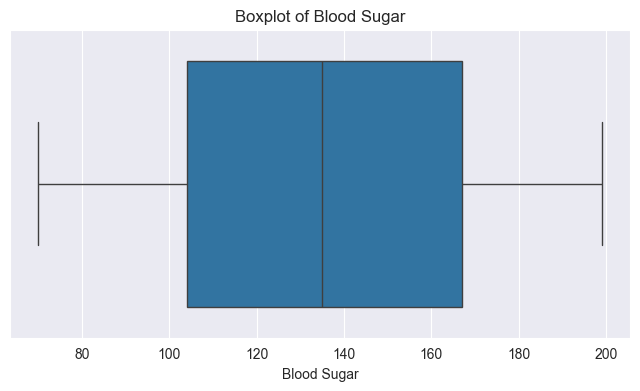

In [22]:
# Boxplot showing the distribution
plt.figure(figsize=(8,4))
sns.boxplot(x=df[var])                       
plt.title(f'Boxplot of {var}')
plt.show()

Note - An important observation is that the cholesterol values in the dataset are higher than average.

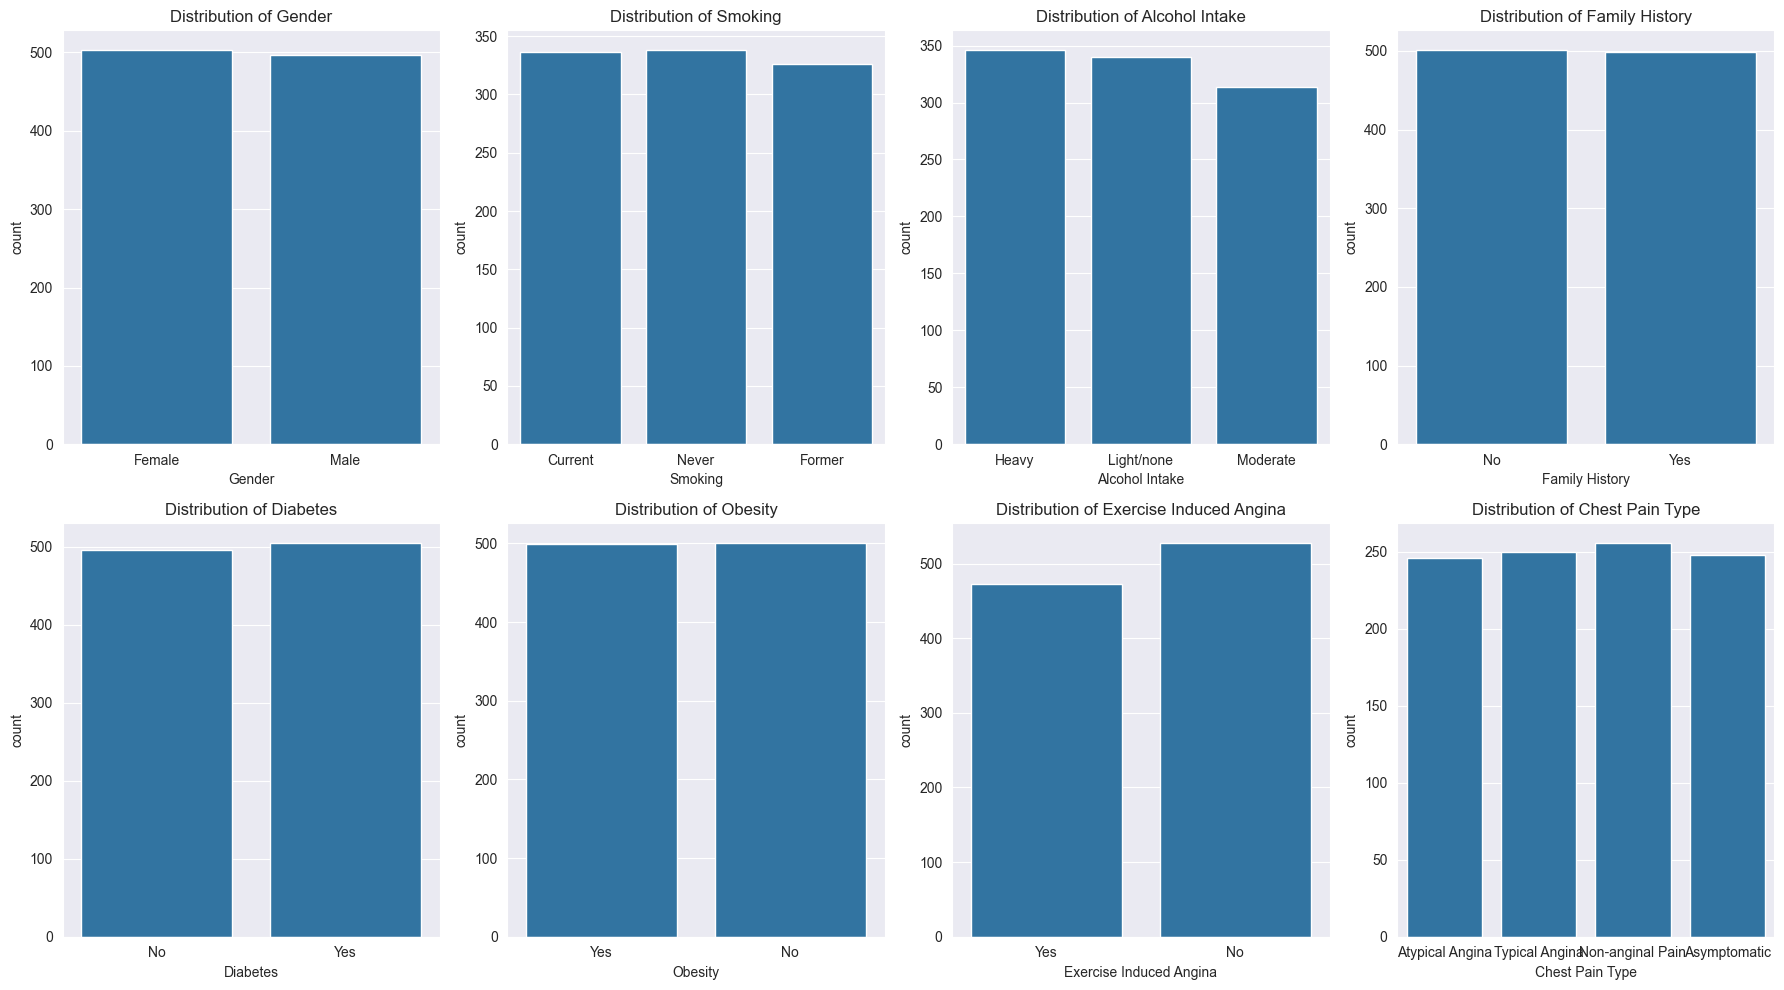

In [24]:
# Plotting the Categorical Values
categorical_vars = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']

n_rows = 2          # To display all plots in the same page
n_cols = 4
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 10))      # Specifications of the plot
axs = axs.flatten()

for i, var in enumerate(categorical_vars):             # Function for Multiple Plots
    ax = axs[i]
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'Distribution of {var}')   
plt.tight_layout()      # Prevents Overlapping
plt.show()

#### Inferences from the plot:

a) Men have a slightly higher risk of developing heart disease compared to women.

b) People with diabetes have a higher risk.


### Scaling and Normalizing the data

In [27]:
# Encoding binary categorical variables into numerical values for better analysis
binary_columns = ['Gender', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [28]:
# One-hot encoding for categorical variables with more than two categories
df = pd.get_dummies(df, columns=['Smoking', 'Chest Pain Type', 'Alcohol Intake'], drop_first=True)

In [29]:
# Normalizing numerical features to make the range of the values common
numerical_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [30]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina,Alcohol Intake_Light/none,Alcohol Intake_Moderate
0,1.444534,0,-0.379005,-0.617287,-1.150139,-1.203298,0,0,1,0.831917,-0.434581,1,1,False,False,True,False,False,False,False
1,-0.273104,1,-0.793616,1.126782,-1.498561,0.160599,0,0,0,1.185323,-1.770413,1,0,False,False,False,False,True,True,False
2,0.044977,1,-0.275353,-1.678894,-1.063034,-0.521350,1,0,1,-0.228300,1.664583,1,1,False,True,True,False,False,False,False
3,1.062836,0,-1.000921,-1.716808,-0.627507,-0.180375,0,1,0,0.478511,-0.761724,1,0,False,False,False,True,False,True,False
4,0.617523,0,-1.346429,1.050953,1.201706,0.501573,0,1,0,-1.288517,1.310178,1,0,False,True,False,False,False,True,False


### Correlation Matrix and further readings

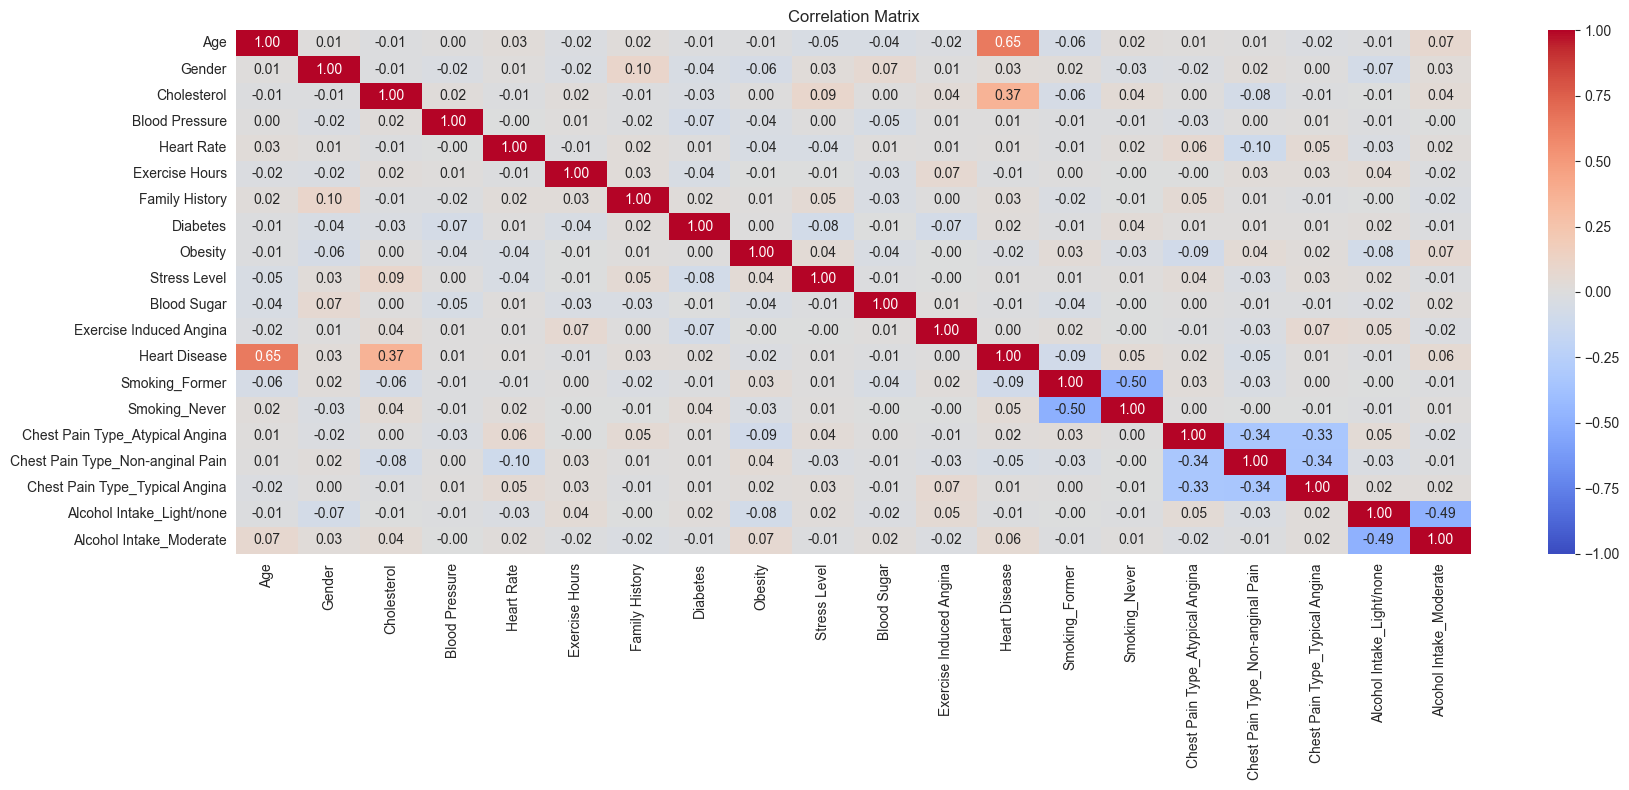

In [32]:
# creating a heatmap will help us numerically visualize the correlations among variables
plt.figure(figsize=(18, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Note - The main factors strongly linked to heart disease are age and cholesterol. 

### Models

In [35]:
# Splitting the data into training and testing set

x_train,x_test,y_train,y_test = train_test_split(df.drop('Heart Disease',axis=1),df['Heart Disease'],train_size=0.8,random_state=15)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
prediction = model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       124
           1       0.79      0.75      0.77        76

    accuracy                           0.83       200
   macro avg       0.82      0.81      0.82       200
weighted avg       0.83      0.83      0.83       200



In [38]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt=".0f");

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
pred = rf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [41]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt=".0f");

## Conclusion

We used two different models for this dataset. The logistic regression model achieved an accuracy of 83%, which is decent but there is potential for better models. On the other hand, the RandomForestClassifier model gave a perfect accuracy of 100%, showing that it works really well for this dataset.

It's a good idea to try multiple models and compare their performance.